In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Wholesale Customers Analysis

In [3]:
df = pd.read_csv(r'C:\Users\User\Downloads\Wholesale+Customers+Data.csv')

## Exploratory Data Analysis

In [4]:
#Data description and data type in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
#Checking for null values in dataset
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
#Checking number of rows and columns
df.shape

(440, 9)

In [7]:
#Copying orginal dataset to another 
df_copy = df.copy()

In [8]:
#Adding all 6 items to a new column in dataset
df_copy['Spendings'] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']

In [9]:
#First five rows in dataset
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
#First five rows in dataset with added spendings column
df_copy.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spendings
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [11]:
pd.DataFrame(df_copy.groupby(['Region','Channel'])['Spendings'].sum())

Spendings
Region Channel           
Lisbon Hotel      1538342
       Retail      848471
Oporto Hotel       719150
       Retail      835938
Other  Hotel      5742077
       Retail     4935522

In [12]:
#Descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


# Problem-1

## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [13]:
#Descriptive statistics of all columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [14]:
df.columns[3:9]

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [15]:
#Five number summary of all  different varieties

In [16]:
for i in df.columns[3:9]:
    print(i)

Fresh
Milk
Grocery
Frozen
Detergents_Paper
Delicatessen


In [17]:
 def Five_number_Sumamry(column):    
    for i, column in enumerate(df.columns[3:9]):
        five_num = [df[column].quantile(0), 
            df[column].quantile(0.25), 
            df[column].quantile(0.50), 
            df[column].quantile(0.75), 
            df[column].quantile(1)]
        print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])
        print('IQR:',stats.iqr(df[column]))
        print('.......................',i,'-',column)

In [18]:
Five_number_Sumamry('')

Minimum: 3.0 
25%: 3127.75 
50% or Median: 8504.0 
75%: 16933.75 
Maximum: 112151.0
IQR: 13806.0
....................... 0 - Fresh
Minimum: 55.0 
25%: 1533.0 
50% or Median: 3627.0 
75%: 7190.25 
Maximum: 73498.0
IQR: 5657.25
....................... 1 - Milk
Minimum: 3.0 
25%: 2153.0 
50% or Median: 4755.5 
75%: 10655.75 
Maximum: 92780.0
IQR: 8502.75
....................... 2 - Grocery
Minimum: 25.0 
25%: 742.25 
50% or Median: 1526.0 
75%: 3554.25 
Maximum: 60869.0
IQR: 2812.0
....................... 3 - Frozen
Minimum: 3.0 
25%: 256.75 
50% or Median: 816.5 
75%: 3922.0 
Maximum: 40827.0
IQR: 3665.25
....................... 4 - Detergents_Paper
Minimum: 3.0 
25%: 408.25 
50% or Median: 965.5 
75%: 1820.25 
Maximum: 47943.0
IQR: 1412.0
....................... 5 - Delicatessen


In [19]:
pd.DataFrame(df.groupby('Region')['Channel'].value_counts())

Channel
Region Channel         
Lisbon Hotel         59
       Retail        18
Oporto Hotel         28
       Retail        19
Other  Hotel        211
       Retail       105

In [20]:
#Descriptive statistics of the data shows :
 #Among 3 region in portugal the most occuring region is 'Other'(316) followed by 'Lisbon'(77) & 'Oporto'(47)
 #Most occuring sales channel is Hotel(298) followed by Retail(142)
 # There are no null or missing values in the provided dataset.
 # For fresh product mean is 12000.29 , mininum value is 3.0 and maximum value is 112151.0
 

In [21]:
#Region and which Channel spent the most & Region and which Channel spent the least :

In [22]:

pd.DataFrame(df_copy.groupby(['Region','Channel'])['Spendings'].sum())

Spendings
Region Channel           
Lisbon Hotel      1538342
       Retail      848471
Oporto Hotel       719150
       Retail      835938
Other  Hotel      5742077
       Retail     4935522

In [23]:
pd.DataFrame(df_copy.groupby('Region')['Spendings'].sum())

,Spendings
Region,
Lisbon,2386813
Oporto,1555088
Other,10677599


In [24]:
pd.DataFrame(df_copy.groupby('Channel')['Spendings'].sum())

,Spendings
Channel,
Hotel,7999569
Retail,6619931


<AxesSubplot:xlabel='Region'>

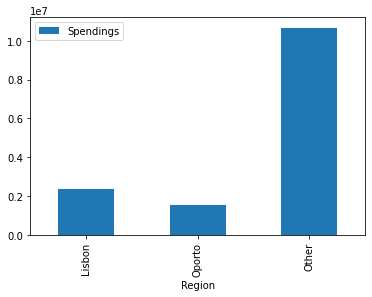

In [25]:
pd.DataFrame(df_copy.groupby('Region')['Spendings'].sum()).plot(kind='bar')

<AxesSubplot:xlabel='Channel'>

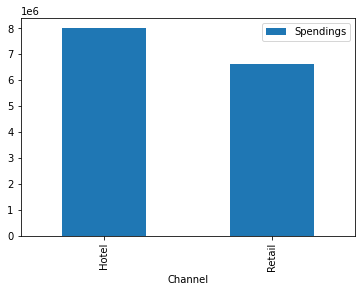

In [26]:
pd.DataFrame(df_copy.groupby('Channel')['Spendings'].sum()).plot(kind='bar')

<AxesSubplot:xlabel='Region,Channel'>

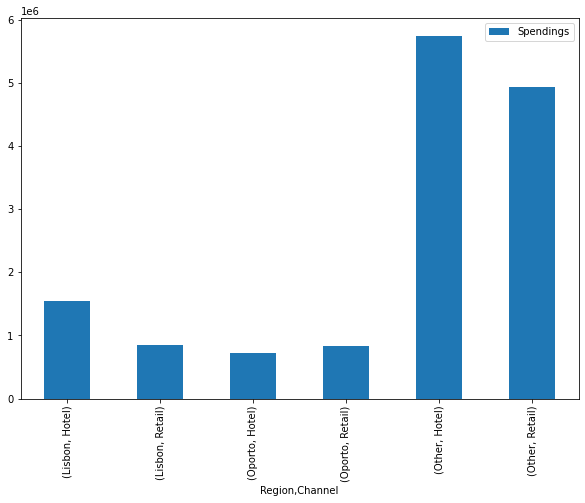

In [27]:
#Barplot to show Region and which Channel spent the most and least
pd.DataFrame(df_copy.groupby(['Region','Channel'])['Spendings'].sum()).plot(kind='bar',figsize=(10,7))

In [28]:
#Oporto region hotel spends the least followed by Lisbon region retail and  Oporto region retail
#Other region hotel spends the most followed by Other region retail 
#We can conclude Other region spends more in hotel and retail than Lisbon and Oporto also Oporto spends the least on both channels.
#Among hotel channel Other region spends more followed by Lisbon and Oporto
#Among retail channel Other region spends more followed by Oporto and Lisbon

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [29]:
#Grouping data based on region and items

In [30]:
df1=df_copy.groupby('Region')[df.columns[3:10]].sum()

In [31]:
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [32]:
#Bar plot to show the spending on each item region wise

<AxesSubplot:xlabel='Region'>

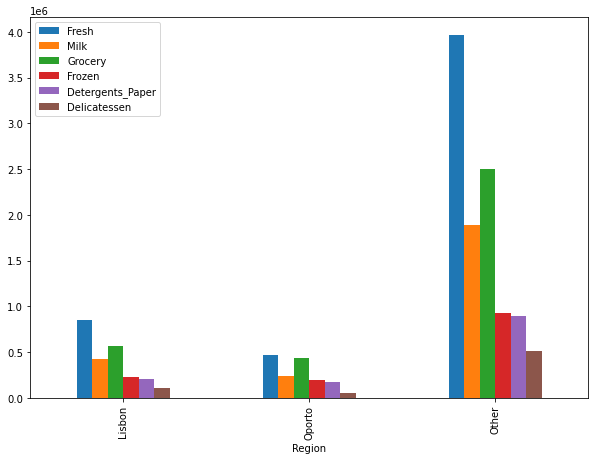

In [38]:
df1.plot(kind='bar',figsize=(10,7))

In [39]:
#Other region spends the most in all the 6 different items and  Oporto region spends the least in all items.

In [40]:
#Grouping data based on channel and items

In [41]:
df2=df_copy.groupby('Channel')[df.columns[3:9]].sum()

In [42]:
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [43]:
#Bar plot to show the same

<AxesSubplot:xlabel='Channel'>

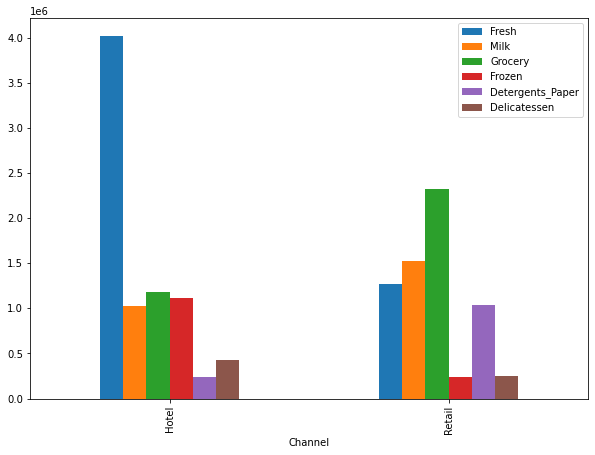

In [44]:
df2.plot(kind='bar',figsize=(10,7))

In [45]:
#Milk,grocery and detergents_Paper items spends more across retail channelin all regions
#Fresh,frozen and delicatessen items spends more across hotel in all regions

In [46]:
df4=df_copy.groupby('Region')[df.columns[3:10]].count()

In [47]:
df4

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,77,77,77,77,77,77
Oporto,47,47,47,47,47,47
Other,316,316,316,316,316,316


In [48]:
df5=df_copy.groupby('Channel')[df.columns[3:10]].count()

In [49]:
df5

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,298,298,298,298,298,298
Retail,142,142,142,142,142,142


In [50]:
for i, col in enumerate(df.columns[3:9]):
    min = df[col].quantile(0.25)-(1.5*(stats.iqr(df[col])))
    max = df[col].quantile(0.75)+(1.5*(stats.iqr(df[col])))
    print('Calcluated mininmum for',col,'is', min ,'\nCalcluated maximum for',col,'is', round(max,2))

Calcluated mininmum for Fresh is -17581.25 
Calcluated maximum for Fresh is 37642.75
Calcluated mininmum for Milk is -6952.875 
Calcluated maximum for Milk is 15676.12
Calcluated mininmum for Grocery is -10601.125 
Calcluated maximum for Grocery is 23409.88
Calcluated mininmum for Frozen is -3475.75 
Calcluated maximum for Frozen is 7772.25
Calcluated mininmum for Detergents_Paper is -5241.125 
Calcluated maximum for Detergents_Paper is 9419.88
Calcluated mininmum for Delicatessen is -1709.75 
Calcluated maximum for Delicatessen is 3938.25


In [51]:
for i, col in enumerate(df.columns[3:9]):
    cv= np.std(df[col])/np.mean(df[col])
    print('The coeffiecent of Variation for',col,'item is', round(cv,2))

The coeffiecent of Variation for Fresh item is 1.05
The coeffiecent of Variation for Milk item is 1.27
The coeffiecent of Variation for Grocery item is 1.19
The coeffiecent of Variation for Frozen item is 1.58
The coeffiecent of Variation for Detergents_Paper item is 1.65
The coeffiecent of Variation for Delicatessen item is 1.85


In [52]:
df[df.columns[3:9]].skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

##  1.3 On the basis of the descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behavior?

In [53]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [54]:
for i, col in enumerate(df.columns[3:9]):
    sd = np.std(df[col])
    print('The standard deveation for',col,'item is', round(sd,2))

The standard deveation for Fresh item is 12632.95
The standard deveation for Milk item is 7371.99
The standard deveation for Grocery item is 9492.36
The standard deveation for Frozen item is 4849.15
The standard deveation for Detergents_Paper item is 4762.43
The standard deveation for Delicatessen item is 2816.9


In [46]:
#Standard deviation of fresh items is the highest and delicatessen is the lowest.

In [47]:
for i, col in enumerate(df.columns[3:9]):
    cv= np.std(df[col])/np.mean(df[col])
    print('The coeffiecent of Variation for',col,'item is', round(cv,2))

The coeffiecent of Variation for Fresh item is 1.05
The coeffiecent of Variation for Milk item is 1.27
The coeffiecent of Variation for Grocery item is 1.19
The coeffiecent of Variation for Frozen item is 1.58
The coeffiecent of Variation for Detergents_Paper item is 1.65
The coeffiecent of Variation for Delicatessen item is 1.85


In [48]:
#“Fresh” item have lowest coefficient of Variation 
#“Delicatessen” item have highest coefficient of Variation
#Even though the mean of these items may differ ,coefficient of Variation is useful measure for comparing the variability between two different datasets.
#Thus we may conclude fresh items are least inconsistent and Delicatessen are the  most inconsistent ones.

## Question 1.4 Are there any outliers in the data?

<AxesSubplot:>

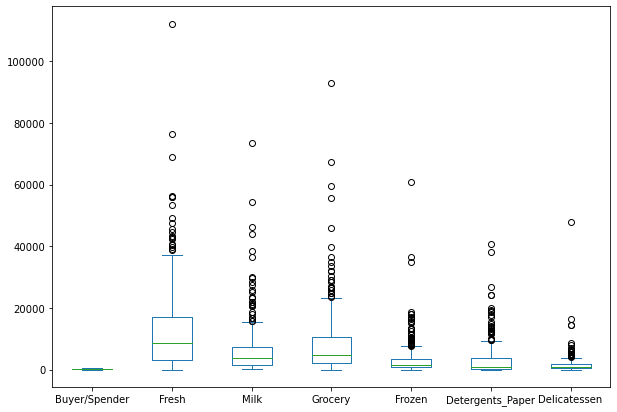

In [55]:
df.plot(kind='box',figsize=(10,7))

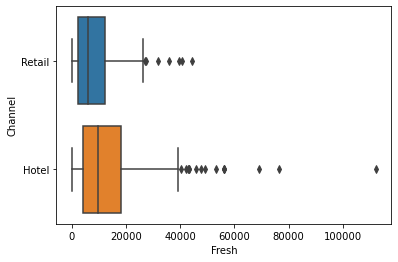

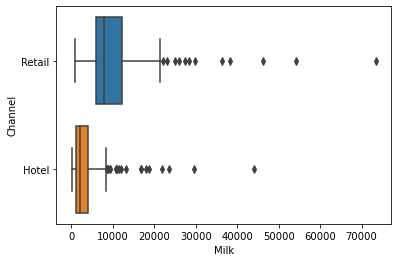

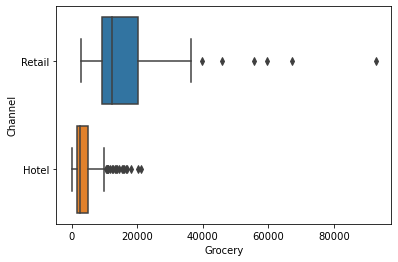

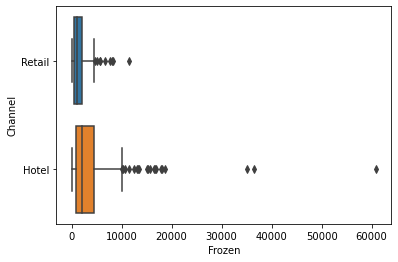

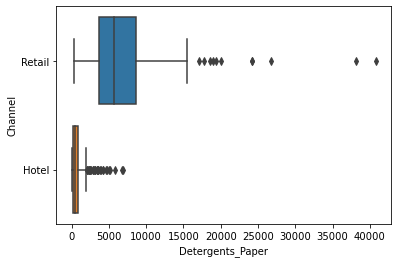

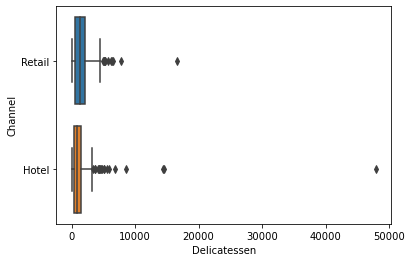

In [56]:
for i, col_1 in enumerate(df.columns[3:9]):
    plt.figure(i)
    sns.boxplot(data=df,x= df[col_1],y=df['Channel'])

## Question 1.5 On the basis of this report, what are the recommendations?

In [57]:
#Other region spends most in both hotel and retail channels.Oporto region can improve the sales by increasing the number of retail and hotels.The amount of money customer spends most is through hotel rather than retail channel in Lisbon and Other region.Oporto region customer spends most through retail channel.So it is advised to increase the number of retail stores in Oporto.Frozen, and Delicatessen are least spend through retail. Detergents paper is least spend through the hotel channel.Fresh item is the most consistent among all 6 products & Delicatessen is the inconsistent.

# Survey-Problem-2

In [58]:
survey = pd.read_csv(r'C:\Users\User\Downloads\Survey.csv')

In [148]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [149]:
survey.shape

(62, 14)

In [150]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [151]:
survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [152]:
survey['Age'].min()

18

In [153]:
survey['Age'].max()

26

In [154]:
survey[['Class']].value_counts()

Class    
Senior       31
Junior       25
Sophomore     6
dtype: int64

In [155]:
survey['Major'].value_counts()

Retailing/Marketing       14
Economics/Finance         11
Management                10
Other                      7
Accounting                 7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64

In [156]:
survey['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [157]:
survey['GPA'].min()

2.3

In [158]:
survey['GPA'].max()

3.9

In [159]:
survey['Employment'].value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

In [160]:
survey['Salary'].min()

25.0

In [161]:
survey['Salary'].max()

80.0

In [162]:
survey[['Social Networking','Satisfaction','Spending','Text Messages']].min()

Social Networking      0
Satisfaction           1
Spending             100
Text Messages          0
dtype: int64

In [163]:
survey[['Social Networking','Satisfaction','Spending','Text Messages']].max()

Social Networking       4
Satisfaction            6
Spending             1400
Text Messages         900
dtype: int64

In [164]:
survey['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [165]:
#EDA

In [166]:
survey.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [167]:
pd.crosstab(survey['Gender'],columns=survey['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [168]:
pd.crosstab(survey['Gender'],columns=survey['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment

In [169]:
pd.crosstab(survey['Gender'],columns=survey['Employment'],margins=True
)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Gender and Computer

In [170]:
pd.crosstab(survey['Gender'],columns=survey['Computer'],margins=True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [171]:
survey['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [172]:
survey['Gender'].value_counts().sum()

62

In [173]:
29/62

0.46774193548387094

In [174]:
'There is possibility that 46.7% of students are males in CMSU'

'There is possibility that 46.7% of students are males in CMSU'

## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [175]:
33/62

0.532258064516129

In [176]:
'There is possibility that 53.2% of students are Females in CMSU'

'There is possibility that 53.2% of students are Females in CMSU'

## 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [177]:
pd.crosstab(survey['Gender'],columns=survey['Major'],margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [211]:
pd.crosstab(survey['Gender'],columns=survey['Major'],normalize='index',margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


In [179]:
survey['Major']

0                      Other
1                 Management
2                      Other
3                        CIS
4                      Other
               ...          
57    International Business
58                       CIS
59                       CIS
60                Accounting
61         Economics/Finance
Name: Major, Length: 62, dtype: object

In [180]:
#There is a probability 13.79% of Accounting major among the male students in CMSU.
#There is a probability 3.44% of CIS major among the male students in CMSU.
#There is a probability 13.79% of Economics/Finance major among the male students in CMSU.
#There is a probability 6.89% of International Business major among the male students in CMSU.
#There is a probability 20.68% of Management major among the male students in CMSU.
#There is a probability 13.79% of Other major among the male students in CMSU.
#There is a probability 17.2% of Retailing/Marketing major among the male students in CMSU.
#There is a probability 10.3% of Undecided major among the male students in CMSU.

### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [181]:
#There is a probability 9.09% of Accounting major among the female students in CMSU.
#There is a probability 9.09% of CIS major among the female students in CMSU.
#There is a probability 21.21% of Economics/Finance major among the female students in CMSU.
#There is a probability 12.12% of International Business major among the female students in CMSU.
#There is a probability 12.12% of Management major among the female students in CMSU.
#There is a probability 9.09% of Other major among the female students in CMSU.
#There is a probability 27.27% of Retailing/Marketing major among the female students in CMSU.
#There is a probability 0% of Undecided major among the female students in CMSU.

## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [182]:
pd.crosstab(survey['Gender'],columns=survey['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [38]:
pd.crosstab(survey['Gender'],columns=survey['Grad Intention'],normalize='index',margins=True)

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613


In [39]:
#There is a probability 58.6% of student is a male and intends to graduate among the students in CMSU.

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [40]:
pd.crosstab(survey['Gender'],columns=survey['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [185]:
pd.crosstab(survey['Gender'],columns=survey['Computer'],normalize='index',margins=True)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000
All,0.080645,0.887097,0.032258


In [42]:
1-0.878788

0.12121199999999999

In [43]:
#Among students of CMSU  12.12% of females do not have a laptop.

##   2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [44]:
pd.crosstab(survey['Gender'],columns=survey['Employment'],margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [45]:
pd.crosstab(survey['Gender'],columns=survey['Employment'],normalize='index',margins=True)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,0.090909,0.727273,0.181818
Male,0.241379,0.655172,0.103448
All,0.161290,0.693548,0.145161


In [46]:
pd.crosstab(survey['Gender'],columns=survey['Employment'],normalize=True,margins=True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,0.048387,0.387097,0.096774,0.532258
Male,0.112903,0.306452,0.048387,0.467742
All,0.161290,0.693548,0.145161,1.000000


In [47]:
#16.12% ofstudents are employed Full-Time 

In [48]:
#Probability of choosing a random male is 46.77%

In [49]:
## P(A∪B)=P(A)+P(B)−P(A∩B)

In [50]:
# P(male  ∩ full time employment) = 7/62

In [51]:
7/62

0.11290322580645161

In [52]:
46.77+16.12-11.29

51.6

### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [53]:
pd.crosstab(survey['Gender'],columns=survey['Major'],normalize='index',margins=True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


In [54]:
0.1212+0.1212

0.2424

## 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [186]:
pd.crosstab(survey['Gender'],columns=survey['Grad Intention'],margins=True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [187]:
survey_copy = survey.copy()

In [188]:
survey_copy.drop(survey_copy[survey_copy['Grad Intention']=='Undecided'].index,inplace=True)

In [189]:
pd.crosstab(survey_copy['Gender'],columns=survey_copy['Grad Intention'],margins=True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [190]:
pd.crosstab(survey_copy['Gender'],columns=survey_copy['Grad Intention'],margins=True,normalize='index')

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


In [191]:
pd.crosstab(survey_copy['Gender'],columns=survey_copy['Grad Intention'],margins=True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [61]:
#P(Female ∩ Grad Intention_Yes)
11/20

0.55

In [62]:
#P(Female)
20/40

0.5

In [63]:
#The probability that a randomly selected Student is Female 50.0 
#The probability that a randomly selected student is female and intends to graduate 55.0 % 
#They are not independent events 

## 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [64]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [65]:
survey[survey['GPA']<3].nunique()

ID                   17
Gender                2
Age                   6
Class                 3
Major                 7
Grad Intention        3
GPA                   6
Employment            3
Salary                8
Social Networking     4
Satisfaction          6
Spending              9
Computer              1
Text Messages        11
dtype: int64

In [66]:
# Total number of students having GPA less than 3 is 17.
# Total number of students is 62

In [67]:
17/62

0.27419354838709675

In [68]:
#27.4% of students have GPA is less than 3

### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [69]:
pd.DataFrame(survey[(survey['Gender']=='Male')&(survey['Salary']>=50)]).nunique()


ID                   14
Gender                1
Age                   6
Class                 3
Major                 6
Grad Intention        3
GPA                   8
Employment            3
Salary                7
Social Networking     4
Satisfaction          5
Spending              7
Computer              2
Text Messages        11
dtype: int64

In [70]:
pd.DataFrame(survey[(survey['Gender']=='Male')]).nunique()

ID                   29
Gender                1
Age                   7
Class                 3
Major                 8
Grad Intention        3
GPA                  11
Employment            3
Salary               13
Social Networking     5
Satisfaction          5
Spending             11
Computer              2
Text Messages        18
dtype: int64

In [71]:
14/29

0.4827586206896552

In [72]:
#48.27% of males earns greater than or equals to 50

In [73]:
pd.DataFrame(survey[(survey['Gender']=='Female')&(survey['Salary']>=50)]).nunique()

ID                   18
Gender                1
Age                   6
Class                 3
Major                 7
Grad Intention        3
GPA                  11
Employment            3
Salary                6
Social Networking     4
Satisfaction          6
Spending             12
Computer              3
Text Messages        11
dtype: int64

In [74]:
pd.DataFrame(survey[(survey['Gender']=='Female')]).nunique()

ID                   33
Gender                1
Age                   6
Class                 3
Major                 7
Grad Intention        3
GPA                  15
Employment            3
Salary               13
Social Networking     4
Satisfaction          6
Spending             17
Computer              3
Text Messages        17
dtype: int64

In [75]:
18/33

0.5454545454545454

In [76]:
#54.54 % of female earns greater than or equals to 50

## 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

In [59]:
survey.head(1)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200


In [60]:
list = ['GPA','Salary','Spending','Text Messages']

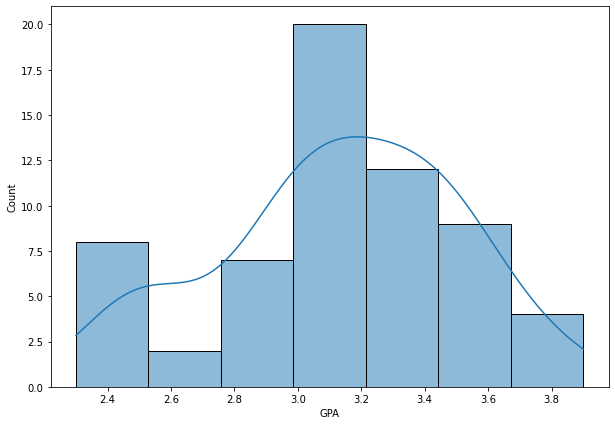

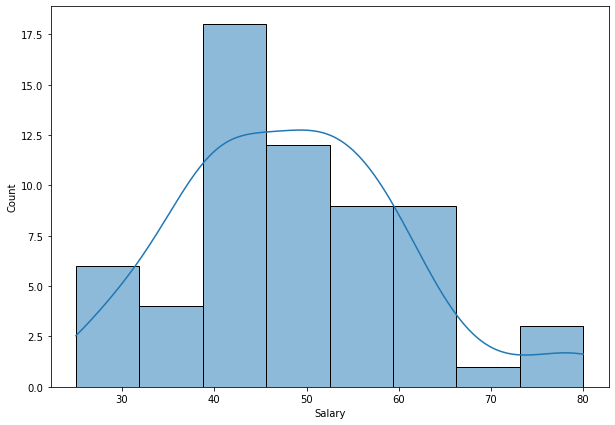

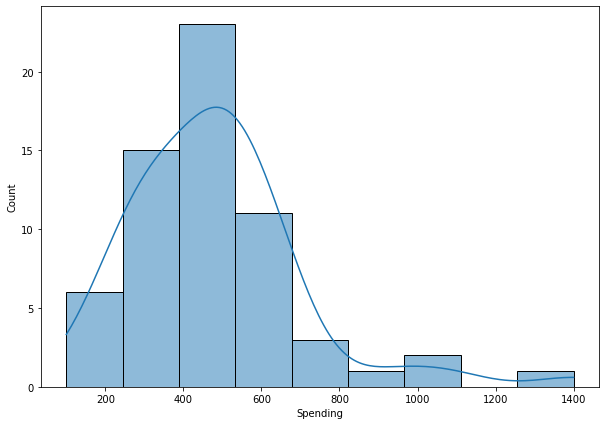

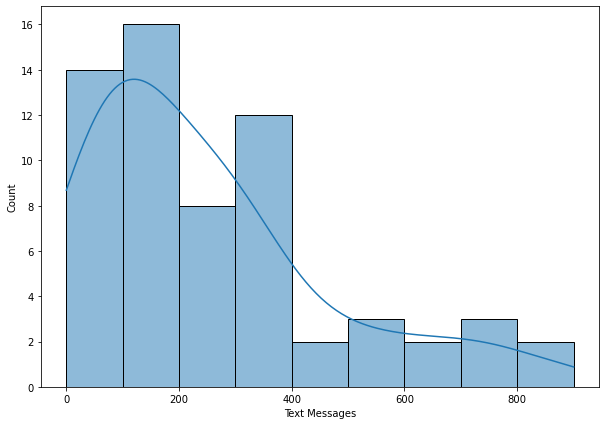

In [61]:
for i in survey[['GPA','Salary','Spending','Text Messages']]:
    plt.figure(figsize=(10,7))
    sns.histplot(survey[i],kde=True)
    plt.show()

In [62]:
survey[['GPA','Salary','Spending','Text Messages']].skew()

GPA             -0.314600
Salary           0.534701
Spending         1.585915
Text Messages    1.295808
dtype: float64

In [63]:
t1,p1=stats.shapiro(survey['GPA'])

In [64]:
t2,p2=stats.shapiro(survey['Salary'])

In [65]:
t3,p3=stats.shapiro(survey['Spending'])

In [66]:
t4,p4=stats.shapiro(survey['Text Messages'])

In [67]:
alpha = 0.05

In [68]:
x= [p1,p2,p3,p4]
x

[0.11204058676958084,
 0.028000956401228905,
 1.6854661225806922e-05,
 4.324040673964191e-06]

In [69]:
j= survey[['GPA','Salary','Spending','Text Messages']]

In [70]:
j.columns

Index(['GPA', 'Salary', 'Spending', 'Text Messages'], dtype='object')

In [71]:
for i in x :
    if (i > alpha):
        print(i,'follows a normal distruibution')
    else:
        print(i,'doesnot follows a normal distruibution')

0.11204058676958084 follows a normal distruibution
0.028000956401228905 doesnot follows a normal distruibution
1.6854661225806922e-05 doesnot follows a normal distruibution
4.324040673964191e-06 doesnot follows a normal distruibution


In [72]:
for i in survey[['GPA','Salary','Spending','Text Messages']]:
    print('The mean of',i,'is',survey[i].mean(),'\nThe median of',i,'is',survey[i].median(),'\nThe mode of',i,'is',survey[i].mode()[0],'\n')

The mean of GPA is 3.129032258064516 
The median of GPA is 3.1500000000000004 
The mode of GPA is 3.0 

The mean of Salary is 48.54838709677419 
The median of Salary is 50.0 
The mode of Salary is 40.0 

The mean of Spending is 482.01612903225805 
The median of Spending is 500.0 
The mode of Spending is 500 

The mean of Text Messages is 246.20967741935485 
The median of Text Messages is 200.0 
The mode of Text Messages is 300 



In [73]:
#In all these cases mean not eauals to median not equals to mode.All the datas are 

## 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [74]:
shingles = pd.read_csv(r'C:\Users\User\Downloads\A+&+B+shingles.csv')

In [75]:
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [76]:
shingles.tail()

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [77]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [78]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

In [79]:
# The counts of sample A & B differs.

In [80]:
shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


### Step 1: Define null and alternative hypotheses

In [81]:
#For sample A & B

In [82]:
#H0 : mean moisture content <=0.35
#HA : mean moisture content > 0.35

### Step 2: Decide the significance level

In [83]:
#level of significance = 0.05

### Step 3: Identify the test statistic

In [12]:
#One sample ttest-

In [84]:
mu = 0.35

### Step 4: Calculate the p - value and test statistic

In [85]:
#Shingles A p_value-ttest_1samp
ttest_1,p_value1=stats.ttest_1samp(shingles['A'],mu)

In [86]:
ttest_1

-1.4735046253382782

In [87]:
p_value1

0.14955266289815025

In [99]:
#Shingles B p_value-ttest_1samp
ttest_2,p_value2=stats.ttest_1samp(shingles['B'].dropna(),0.35)

In [100]:
p_value2

0.004180954800638363

In [90]:
#This is a two tailed test

In [91]:
#Shingles A p_value
p_value1/2

0.07477633144907513

In [101]:
#Shingles B p_value
p_value2/2

0.0020904774003191813

### Step 5 Decide to reject or accept null hypothesis 

In [102]:
#p_value is greater than level of significance for sample A

In [103]:
#So we fail to reject null hypothesis for sample A

In [104]:
#p_value is lesser than level of significance for sample B

In [105]:
#So we reject null hypothesis for sample B

In [106]:
#With 95% confidence we can state that average mositure content in shingle sample A is less than 0.35 pounds per 100 square feet.

In [107]:
#With 95% confidence we can state that average mositure content in shingle sample B is greater than 0.35 pounds per 100 square feet.

## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Step 1: Define null and alternative hypotheses

In [28]:
#H0 : mean of A equals mean of B
#HA : mean of A doesnot equals mean of B

### Step 2: Decide the significance level

In [29]:
#level of significance = 0.05

### Step 3: Identify the test statistic

In [38]:
print(stats.shapiro(shingles['A']))

ShapiroResult(statistic=0.9375598430633545, pvalue=0.042670514434576035)


In [39]:
print(stats.shapiro(shingles['B'].dropna()))

ShapiroResult(statistic=0.9172994494438171, pvalue=0.02002784051001072)


In [40]:
stats.levene(shingles['A'],shingles['B'].dropna())

LeveneResult(statistic=0.23808965111555147, pvalue=0.6272312061867605)

In [41]:
#p_value is greater than 0.05.So variences are equal as suggested by levene's test

In [42]:
# Here we have to comapre the population mean of sample A and B.So we can use 2 sample ttest_ind. 

### Step 4: Calculate the p - value and test statistic

In [195]:
stats.ttest_ind(shingles['A'],shingles['B'].dropna())

Ttest_indResult(statistic=1.289628271966112, pvalue=0.2017496571835328)

### Step 5 Decide to reject or accept null hypothesis

In [196]:
#p_value is greater than level of significance

In [197]:
#So we fail to reject null hypothesis

In [198]:
#With 95% confidence we can state that mean sample A equals to mean shingle sample B